# 数据获取

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [2]:
X, y = mnist['data'], mnist['target']

<function matplotlib.pyplot.show(*args, **kw)>

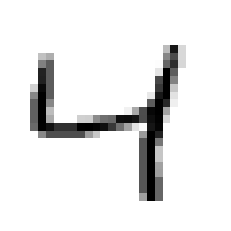

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
example_digit = X[2]
example_digit_image = example_digit.reshape(28, 28)

plt.imshow(example_digit_image, cmap=mpl.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show

In [4]:
y[2]

'4'

In [5]:
import numpy as np
y = y.astype(np.uint8)

In [6]:
x_train, x_test, y_train, y_test = X[:6000], X[6000:], y[:6000], y[6000:]

# 尝试数字4的分类器

In [7]:
y_train_4 = (y_train == 4)
y_test_4 = (y_test == 4)
y_train_4

array([False, False,  True, ..., False, False, False])

In [8]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train_4)
sgd_clf.predict([example_digit])

array([ True])

# 评估

In [9]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_4, cv=3, scoring='accuracy')

array([0.965, 0.974, 0.976])

In [10]:
from sklearn.base import BaseEstimator
class never5(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool) # 返回全零(布尔型)数组，从而使得预测全部不为4
    
cross_val_score(never5(), x_train, y_train_4, cv=3, scoring='accuracy')

array([0.893 , 0.892 , 0.9035])

In [11]:
np.zeros((10, 2), dtype=bool)

array([[False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False],
       [False, False]])

# 四格表

In [12]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_predict = cross_val_predict(sgd_clf, x_train, y_train_4, cv=3)
confusion_matrix(y_train_4, y_train_predict)
# TN FP
# FN TP

array([[5298,   79],
       [  91,  532]], dtype=int64)

In [13]:
# precision = TP / TP + TN
# recall = TP / TP + FN
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_4, y_train_predict))
print(recall_score(y_train_4, y_train_predict))

0.8707037643207856
0.8539325842696629


In [14]:
# f1_score = 2 / (1/precision_score + 1/recall_score) 调和平均数，倾向于准确率和召回率相近时较大
from sklearn.metrics import f1_score
f1_score(y_train_4, y_train_predict)

0.8622366288492707

In [15]:
y_score = cross_val_predict(sgd_clf, x_train, y_train_4, cv=3, method='decision_function')
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_4, y_score)

<function matplotlib.pyplot.show(*args, **kw)>

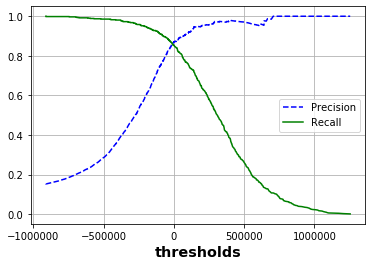

In [16]:
def precision_recall_thresholds_curve(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.grid(True)
    plt.xlabel('thresholds', fontweight=700, size='x-large')
    plt.legend(loc=7)
    
precision_recall_thresholds_curve(precisions, recalls, thresholds)    
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

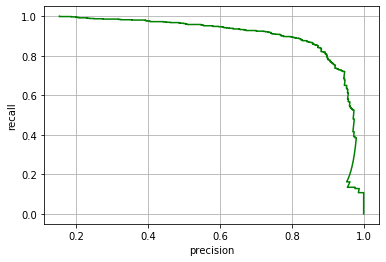

In [17]:
def precision_recall_curve(precisons, recalls):
    plt.plot(precisions, recalls, 'g-')
    plt.grid(True)
    plt.xlabel('precision')
    plt.ylabel('recall')
    
    
precision_recall_curve(precisions, recalls)
plt.show

In [18]:
thresholds_90precision = thresholds[np.argmax(precisions >= 0.90)]
y_train_90pre = (y_score >= thresholds_90precision)
precision_score(y_train_4, y_train_90pre)

0.9007352941176471

# ROC

<function matplotlib.pyplot.show(*args, **kw)>

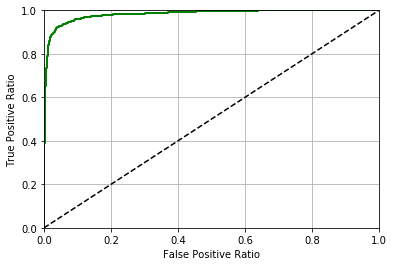

In [19]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_4, y_score)


def plot_roc(fpr, tpr):
    plt.plot(fpr, tpr, 'g-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--') # 对角虚线
    plt.grid(True)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Ratio')
    plt.ylabel('True Positive Ratio')
    
plot_roc(fpr, tpr)
plt.show

In [20]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_4, y_score)

0.9829703890090097

# 随机森林+ROC

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42)
y_proba_rfc = cross_val_predict(rfc, x_train, y_train_4, cv=3, method='predict_proba')
y_proba_rfc

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [0.46, 0.54],
       ...,
       [0.99, 0.01],
       [0.98, 0.02],
       [0.93, 0.07]])

In [22]:
y_score_rfc = y_proba_rfc[:, 1]
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_train_4, y_score_rfc)

<function matplotlib.pyplot.show(*args, **kw)>

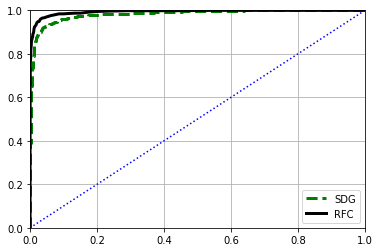

In [23]:
plt.plot(fpr, tpr, 'g--', label='SDG', linewidth=3)
plt.plot(fpr_rfc, tpr_rfc, 'k-', label='RFC', linewidth=3)
plt.plot([0, 1], [0, 1], 'b:')
plt.axis([0, 1, 0, 1])
plt.legend(loc='best')
plt.grid(True)
plt.show

In [24]:
roc_auc_score(y_train_4, y_score)

0.9829703890090097

In [25]:
roc_auc_score(y_train_4, y_score_rfc)

0.9936293069195798

# MULTICLASS CLASSIFICATION

In [29]:
sgd_clf.fit(x_train, y_train)
sgd_clf.predict([example_digit])

array([4], dtype=uint8)

In [30]:
example_digit_score = sgd_clf.decision_function([example_digit])
example_digit_score

array([[-667213.59528693, -856265.96553493,   25236.43491982,
        -339124.12103045,  163436.06850466, -672849.19617037,
        -417699.7471322 , -196421.9378228 , -402936.96002679,
        -506858.13234156]])

In [31]:
np.argmax([example_digit_score])

4

In [32]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [33]:
sgd_clf.classes_[4]

4

In [37]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf_sgd = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf_sgd.fit(x_train, y_train)
ovo_clf_sgd.predict([example_digit])

array([4], dtype=uint8)

In [38]:
len(ovo_clf_sgd.estimators_)

45

In [39]:
rfc.fit(x_train, y_train)
rfc.predict([example_digit])

array([4], dtype=uint8)

In [43]:
rfc.predict_proba([example_digit])

array([[0.01, 0.01, 0.  , 0.02, 0.88, 0.03, 0.  , 0.01, 0.  , 0.04]])

In [44]:
cross_val_score(sgd_clf, x_train, y_train, cv=3, scoring='accuracy')

array([0.8565, 0.8715, 0.8635])

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train.astype(np.float64))
cross_val_score(sgd_clf, x_train_scaler, y_train, cv=3, scoring='accuracy')

array([0.8705, 0.8985, 0.8925])

# error analysis

In [46]:
y_train_pre = cross_val_predict(sgd_clf, x_train_scaler, y_train, cv=3)
con_matrix = confusion_matrix(y_train, y_train_pre)
con_matrix

array([[572,   0,   1,   2,   1,   9,   3,   1,   3,   0],
       [  0, 637,   6,   3,   1,   5,   0,   1,  16,   2],
       [ 10,  12, 493,  11,  10,   4,  10,   9,  20,   2],
       [  3,   5,  21, 514,   1,  35,   1,   7,  11,  10],
       [  3,   2,   7,   0, 556,   2,  10,   8,   9,  26],
       [  5,   6,   5,  24,  14, 411,  10,   1,  25,  13],
       [  4,   4,   6,   0,   5,   6, 577,   1,   5,   0],
       [  3,   4,   7,   2,   9,   0,   1, 577,   3,  45],
       [  2,  19,  13,  16,   4,  10,   6,   3, 464,  14],
       [  7,   4,   5,   7,  15,   3,   0,  27,  11, 522]], dtype=int64)

<function matplotlib.pyplot.show(*args, **kw)>

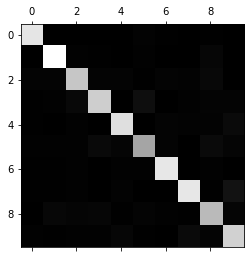

In [47]:
plt.matshow(con_matrix, cmap=plt.cm.gray)
plt.show

In [48]:
row_sums = con_matrix.sum(axis=1, keepdims=True) # 行的和，即各个数字的实例数
row_sums

array([[592],
       [671],
       [581],
       [608],
       [623],
       [514],
       [608],
       [651],
       [551],
       [601]], dtype=int64)

In [49]:
norm_con_matrix = con_matrix/row_sums
norm_con_matrix

array([[0.96621622, 0.        , 0.00168919, 0.00337838, 0.00168919,
        0.0152027 , 0.00506757, 0.00168919, 0.00506757, 0.        ],
       [0.        , 0.94932936, 0.00894188, 0.00447094, 0.00149031,
        0.00745156, 0.        , 0.00149031, 0.02384501, 0.00298063],
       [0.0172117 , 0.02065404, 0.84853701, 0.01893287, 0.0172117 ,
        0.00688468, 0.0172117 , 0.01549053, 0.03442341, 0.00344234],
       [0.00493421, 0.00822368, 0.03453947, 0.84539474, 0.00164474,
        0.05756579, 0.00164474, 0.01151316, 0.01809211, 0.01644737],
       [0.00481541, 0.00321027, 0.01123596, 0.        , 0.89245586,
        0.00321027, 0.01605136, 0.01284109, 0.01444623, 0.04173355],
       [0.00972763, 0.01167315, 0.00972763, 0.04669261, 0.02723735,
        0.79961089, 0.01945525, 0.00194553, 0.04863813, 0.02529183],
       [0.00657895, 0.00657895, 0.00986842, 0.        , 0.00822368,
        0.00986842, 0.94901316, 0.00164474, 0.00822368, 0.        ],
       [0.00460829, 0.00614439, 0.0107526

<function matplotlib.pyplot.show(*args, **kw)>

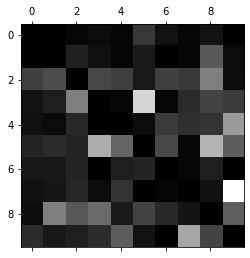

In [54]:
np.fill_diagonal(norm_con_matrix, 0) # 对角填充
plt.matshow(norm_con_matrix, cmap=plt.cm.gray)
plt.show

# multilable classification

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_train_multi = np.c_[y_train_large, y_train_odd]
y_train_multi

array([[False,  True],
       [False, False],
       [False, False],
       ...,
       [ True, False],
       [False, False],
       [ True,  True]])

In [61]:
knc.fit(x_train, y_train_multi)
knc.predict([example_digit])

array([[False, False]])

In [62]:
y_train_knc = cross_val_predict(knc, x_train, y_train_multi, cv=3)
f1_score(y_train_multi, y_train_knc, average='weighted')

0.9529944300252725

# multioutput classification

In [106]:
noise = np.random.randint(0, 100, (len(x_train), 784))
x_train_mod = x_train + noise
noise = np.random.randint(0, 100, (len(x_test), 784))
x_test_mod = x_test + noise
y_train_mod = x_train
y_test_mod = x_test
x_test[55]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  26., 113., 113.,
       114., 113.,  88.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,  86., 210., 231., 252., 252., 253., 252., 246., 130.,  38.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,  32., 25

In [91]:
knc.fit(x_train_mod, y_train_mod)
clean_digit = knc.predict([x_test_mod[55]])
clean_digit

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         98.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   6., 253., 253., 253., 253., 253.,  11.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

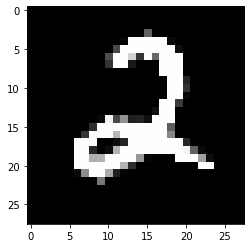

In [108]:
from PIL import Image

clean_digit = clean_digit.reshape(28, 28)
im = Image.fromarray(clean_digit.astype(np.uint8))
plt.imshow(im, cmap=plt.cm.gray)

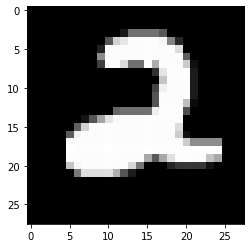

In [109]:
clean_digit = x_test[55].reshape(28, 28)
im = Image.fromarray(clean_digit.astype(np.uint8))
plt.imshow(im, cmap=plt.cm.gray)

In [110]:
y_test[55]

2